In [33]:
ordered_dict = {}
mx = 'mx'
mr = 'mr'
import os
import pandas as pd

# Carpeta raíz
root_folder = "../multiple_n_outputs"

# Recorre todas las combinaciones de a y b
for a_b_folder in os.listdir(root_folder):
    a_b_path = os.path.join(root_folder, a_b_folder)
    if a_b_folder not in ordered_dict:
        ordered_dict[a_b_folder] = {}
    if os.path.isdir(a_b_path):
        
        # Recorre cada subcarpeta para los valores de n
        for n_folder in os.listdir(a_b_path):
            n_path = os.path.join(a_b_path, n_folder)
            if os.path.isdir(n_path):
                print(f"Procesando {n_path}")
                n_value = int(n_folder.split("_")[1])
                n_value = f'{n_value}'
                if n_value not in ordered_dict[a_b_folder]:
                    ordered_dict[a_b_folder][n_value] = []
                # Archivo donde se guardarán las últimas líneas de cada archivo output_n.csv
                output_file_path = os.path.join(n_path, "last_lines.txt")
                
                # Recorre cada archivo output_n.csv en la carpeta n_folder
                for output_filename in sorted(os.listdir(n_path)):
                    if output_filename.startswith("output_") and output_filename.endswith(".csv"):
                        output_file_path = os.path.join(n_path, output_filename)

                        # Leer la última línea del archivo actual usando pandas
                        try:
                            df = pd.read_csv(output_file_path)
                            last_line = df.iloc[-1]  # Obtiene la última fila como cadena
                            aux = {mx: last_line[mx], mr: last_line[mr]}
                            ordered_dict[a_b_folder][n_value].append(aux)
                        except Exception as e:
                            print(f"Error al procesar {output_file_path}: {e}")
print(ordered_dict)

Procesando ../multiple_n_outputs/a_4_b_1/n_45
Procesando ../multiple_n_outputs/a_4_b_1/n_75
Procesando ../multiple_n_outputs/a_4_b_1/n_30
Procesando ../multiple_n_outputs/a_4_b_1/n_90
Procesando ../multiple_n_outputs/a_4_b_1/n_100
Procesando ../multiple_n_outputs/a_4_b_1/n_15
../multiple_n_outputs/a_4_b_1/n_15/output_30.csv
../multiple_n_outputs/a_4_b_1/n_15/output_35.csv
Procesando ../multiple_n_outputs/a_4_b_1/n_60
Procesando ../multiple_n_outputs/a_6_b_0.5/n_45
Procesando ../multiple_n_outputs/a_6_b_0.5/n_75
Procesando ../multiple_n_outputs/a_6_b_0.5/n_30
Procesando ../multiple_n_outputs/a_6_b_0.5/n_90
Procesando ../multiple_n_outputs/a_6_b_0.5/n_100
Procesando ../multiple_n_outputs/a_6_b_0.5/n_15
../multiple_n_outputs/a_6_b_0.5/n_15/output_20.csv
../multiple_n_outputs/a_6_b_0.5/n_15/output_43.csv
../multiple_n_outputs/a_6_b_0.5/n_15/output_50.csv
Procesando ../multiple_n_outputs/a_6_b_0.5/n_60
{'a_4_b_1': {'45': [{'mx': 92.498918677211, 'mr': 0.32}, {'mx': 96.51622765688803, 'mr': 

In [18]:
import numpy as np
runs = 100
trys_dict = {}
max_dist = {}
for combo, n_dict in ordered_dict.items():
    if combo not in trys_dict:
        trys_dict[combo] = {}
    if combo not in max_dist:
        max_dist[combo] = {}
    
    for n_value, n_list in ordered_dict[combo].items():
        n_value = f'{n_value}'
        # Initialize the b_value key in the nested dictionary if it doesn't exist
        if n_value not in trys_dict[combo]:
            trys_dict[combo][n_value] = 0
        if n_value not in max_dist[combo]:
            max_dist[combo][n_value] = {'mean': 0, 'std': 0}
        values = []
        for entry_dict in n_list:
            is_try = 1 if entry_dict[mx] - entry_dict[mr] <= 0 else 0
            trys_dict[combo][n_value] += is_try
            values.append(abs(entry_dict[mx] - 100))
        max_dist[combo][n_value]['mean'] = np.mean(values)
        max_dist[combo][n_value]['std'] = np.std(values)

In [19]:
print(trys_dict)
print(max_dist)

{'a_4_b_1': {'45': 0, '75': 0, '30': 0, '90': 0, '100': 0, '15': 2, '60': 0}, 'a_6_b_0.5': {'45': 0, '75': 0, '30': 0, '90': 0, '100': 0, '15': 3, '60': 0}}
{'a_4_b_1': {'45': {'mean': 8.421786891642578, 'std': 5.302151528286314}, '75': {'mean': 6.205984727307639, 'std': 4.261278021334585}, '30': {'mean': 13.462022962266936, 'std': 8.199206092358146}, '90': {'mean': 5.689377728416824, 'std': 3.8004894723031093}, '100': {'mean': 5.28782157095418, 'std': 3.5044082485230126}, '15': {'mean': 20.28688881714312, 'std': 15.831309050149637}, '60': {'mean': 7.820295434323051, 'std': 5.912345121346647}}, 'a_6_b_0.5': {'45': {'mean': 9.505170208924026, 'std': 6.38215266293825}, '75': {'mean': 6.8026192571791215, 'std': 5.173288141338402}, '30': {'mean': 13.278297585342596, 'std': 8.262310569285104}, '90': {'mean': 5.861071048787271, 'std': 4.173875107407849}, '100': {'mean': 5.261096367896101, 'std': 3.5316305782528103}, '15': {'mean': 21.321864381650606, 'std': 17.836049371317397}, '60': {'mean'

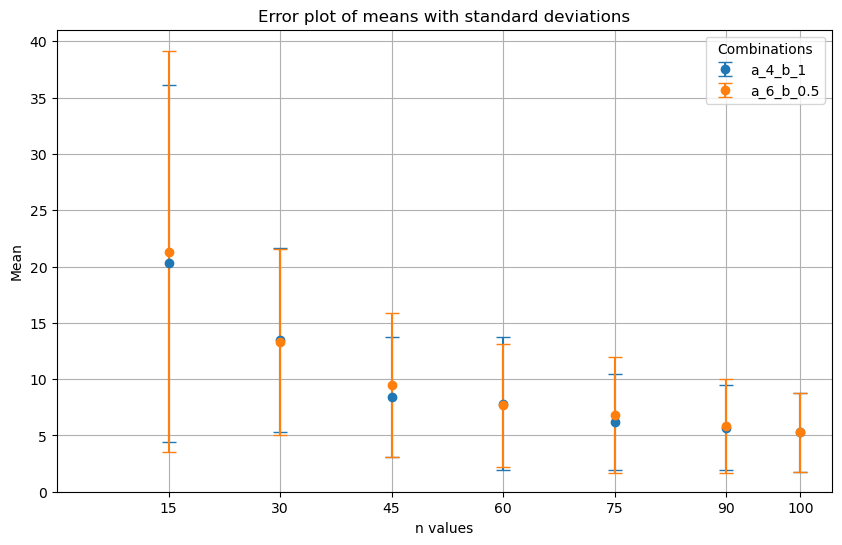

In [27]:
import matplotlib.pyplot as plt

# Valores de n en el eje x (ordenados)
n_values = sorted([int(k) for k in max_dist['a_4_b_1'].keys()])

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar cada conjunto de datos (a=4, b=1 y a=6, b=0.5)
for label, stats in max_dist.items():
    means = [stats[str(n)]['mean'] for n in n_values]
    stds = [stats[str(n)]['std'] for n in n_values]
    ax.errorbar(n_values, means, yerr=stds, label=label, fmt='o', capsize=5)

# Personalizar el gráfico
ax.set_xlabel("n values")
ax.set_ylabel("Mean")
ax.set_title("Error plot of means with standard deviations")
ax.legend(title="Combinations")
ax.set_xticks(n_values)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
plt.grid(True)
plt.show()

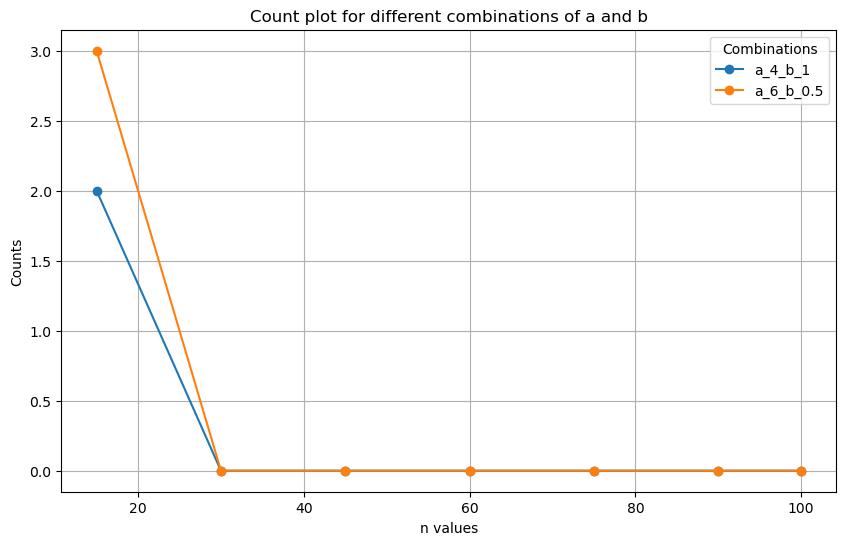

In [32]:
# Valores de n en el eje x (ordenados)
n_values = sorted([int(k) for k in trys_dict['a_4_b_1'].keys()])

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar cada conjunto de datos (a=4, b=1 y a=6, b=0.5)
for label, counts in trys_dict.items():
    counts_values = [counts[str(n)] for n in n_values]
    ax.plot(n_values, counts_values, marker='o', label=label)

# Personalizar el gráfico
ax.set_xlabel("n values")
ax.set_ylabel("Counts")
ax.set_title("Count plot for different combinations of a and b")
ax.legend(title="Combinations")

plt.grid(True)
plt.show()